##  1. MNIST Digits

MNIST 손글씨 이미지를 딥러닝을 이용하여 분류하시오.

In [1]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [13]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [15]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [16]:
net.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.2184 - accuracy: 0.9358
Epoch 2/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.0825 - accuracy: 0.9754
Epoch 3/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.0502 - accuracy: 0.9845
Epoch 4/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0354 - accuracy: 0.98870s - loss: 0.0352 - accuracy: 0.98
Epoch 5/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.0237 - accuracy: 0.9925


In [17]:
test_loss, test_acc = net.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 98us/step


In [18]:
net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
net.fit(X_train, y_train, epochs=1, batch_size=128)

Epoch 1/1
60000/60000 [==============================] - 8s 133us/step - loss: 0.0188 - accuracy: 0.99380s -


In [20]:
test_loss, test_acc = net.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 90us/step


In [21]:
X_train.shape

(60000, 784)

In [24]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
val = net.fit(partial_X_train,partial_y_train,epochs=20, batch_size=128, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 133us/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0144 - val_accuracy: 0.9956
Epoch 2/20
50000/50000 [==============================] - 7s 133us/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0275 - val_accuracy: 0.9921
Epoch 3/20
50000/50000 [==============================] - 6s 129us/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0214 - val_accuracy: 0.9920
Epoch 4/20
50000/50000 [==============================] - 7s 133us/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 5/20
50000/50000 [==============================] - 7s 131us/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0289 - val_accuracy: 0.9905
Epoch 6/20
50000/50000 [==============================] - 7s 135us/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0359 - val_accuracy: 0.9894
Epoch 7/20
50000/50000 [==============================] - 7s 1

In [26]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

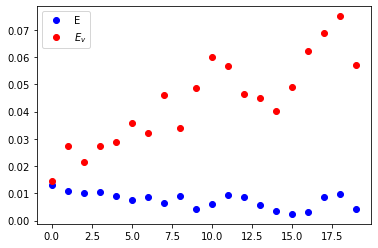

In [27]:
x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend()

## 2. Fashin MNIST

MNIST 패션 이미지를 딥러닝을 이용하여 분류하시오.
MNIST 패션데이터는 10종류의 60000개 패션 학습데이터와 10000개의 테스트 데이터로 구성되어 있습니다. 각각의 레이블의 의미는 다음과 같습니다.


Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [40]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
(X, y), (X_test, y_test) = fashion_mnist.load_data()
(X_train,y_train),(X_test,y_test)=mnist.load_data()
y_test=to_categorical(y_test)

In [41]:
X.shape

(60000, 28, 28)

(9, <matplotlib.image.AxesImage at 0x1e1e2421f98>)

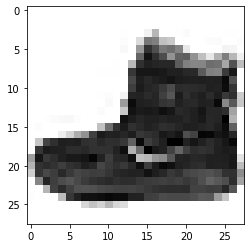

In [42]:
y[0], plt.imshow(X[0],cmap=plt.cm.binary) # Ankle boot

(0, <matplotlib.image.AxesImage at 0x1e1e247d940>)

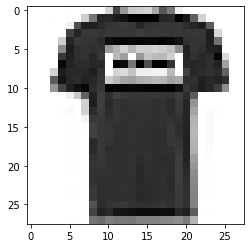

In [43]:
y[1], plt.imshow(X[1],cmap=plt.cm.binary) # T-shirt

손글씨 데이터 분류처럼 패션 데이터를 딥러닝을 이용하여 분류하시오.

In [44]:
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['accuracy'])

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [46]:
net.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
